In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

In [18]:
sales = pd.read_csv('../data/mag/infomkt_sales_puma.csv')

In [19]:
sales.columns

Index(['geoid', 'med_19', 'med_19_infl', 'med_20', 'med_21', 'med_22',
       'sales_19', 'sales_20', 'sales_21', 'sales_22', 'yoy_20', 'yoy_21',
       'yoy_22', 'med_1922', 'medp_1922', 'sales_tot_2022'],
      dtype='object')

## Map prices

In [5]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
geo = gpd.read_file('../data/geo/shapefiles/PUMAS.geojson')
geo.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475..."
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874..."


In [21]:
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)

In [27]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')

In [22]:
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')

In [23]:
lightrail = gpd.read_file('../data/geo/shapefiles/light_rail.geojson')
lightrail = lightrail.to_crs(4269)

### join data to geo files

In [24]:
sales = pd.merge(geo,sales,how='left',left_on='joinid',right_on='geoid')

In [25]:
sales.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry,geoid,med_19,med_19_infl,med_20,med_21,med_22,sales_19,sales_20,sales_21,sales_22,yoy_20,yoy_21,yoy_22,med_1922,medp_1922,sales_tot_2022
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475...",400129,367000.0,422050.0,418000.0,518000.0,591000.0,4720,4703,4349,2975,-17,-354,-1374,168950.0,0.400,12027
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874...",400112,542500.0,623875.0,610000.0,725000.0,897812.0,5163,5821,6034,3895,658,213,-2139,273937.0,0.439,15750


In [26]:
sales.describe()

,ALAND20,AWATER20,joinid,geoid,med_19,med_19_infl,med_20,med_21,med_22,sales_19,sales_20,sales_21,sales_22,yoy_20,yoy_21,yoy_22,med_1922,medp_1922,sales_tot_2022
count,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.500315e+08,4.751324e+05,400119.466667,400119.466667,285333.333333,328133.333333,324008.70000,398862.066667,473854.133333,2751.666667,2716.866667,3045.333333,2260.600000,-34.800000,328.466667,-784.733333,145720.800000,0.450333,8022.800000
std,1.990223e+08,9.764382e+05,5.235411,5.235411,94616.833799,108809.358869,107223.47598,123575.672351,154393.350196,1020.927916,1181.792940,1118.327876,749.419089,245.042329,256.422884,467.708619,50707.691586,0.079874,2993.290359
min,3.348861e+07,2.684700e+04,400112.000000,400112.000000,173000.000000,198950.000000,198619.00000,250000.000000,300000.000000,1365.000000,1221.000000,1465.000000,1190.000000,-419.000000,-354.000000,-2139.000000,99500.000000,0.320000,3876.000000
25%,5.061796e+07,7.029600e+04,400115.500000,400115.500000,231000.000000,265650.000000,262500.00000,332000.000000,392500.000000,2146.000000,2004.500000,2411.000000,1874.000000,-162.000000,228.500000,-901.000000,116625.000000,0.399500,6349.000000
50%,7.508780e+07,1.879480e+05,400119.000000,400119.000000,260000.000000,299000.000000,290000.00000,358710.000000,425000.000000,2636.000000,2509.000000,2802.000000,1987.000000,-17.000000,308.000000,-648.000000,131000.000000,0.439000,7298.000000
75%,1.181456e+08,3.115855e+05,400122.500000,400122.500000,340000.000000,391000.000000,387031.25000,462500.000000,532500.000000,2992.000000,2965.000000,3337.500000,2511.500000,50.000000,473.000000,-507.500000,150012.500000,0.504500,8698.500000
max,6.540404e+08,3.894959e+06,400129.000000,400129.000000,542500.000000,623875.000000,610000.00000,725000.000000,897812.000000,5163.000000,5821.000000,6034.000000,3895.000000,658.000000,824.000000,-275.000000,273937.000000,0.574000,15750.000000


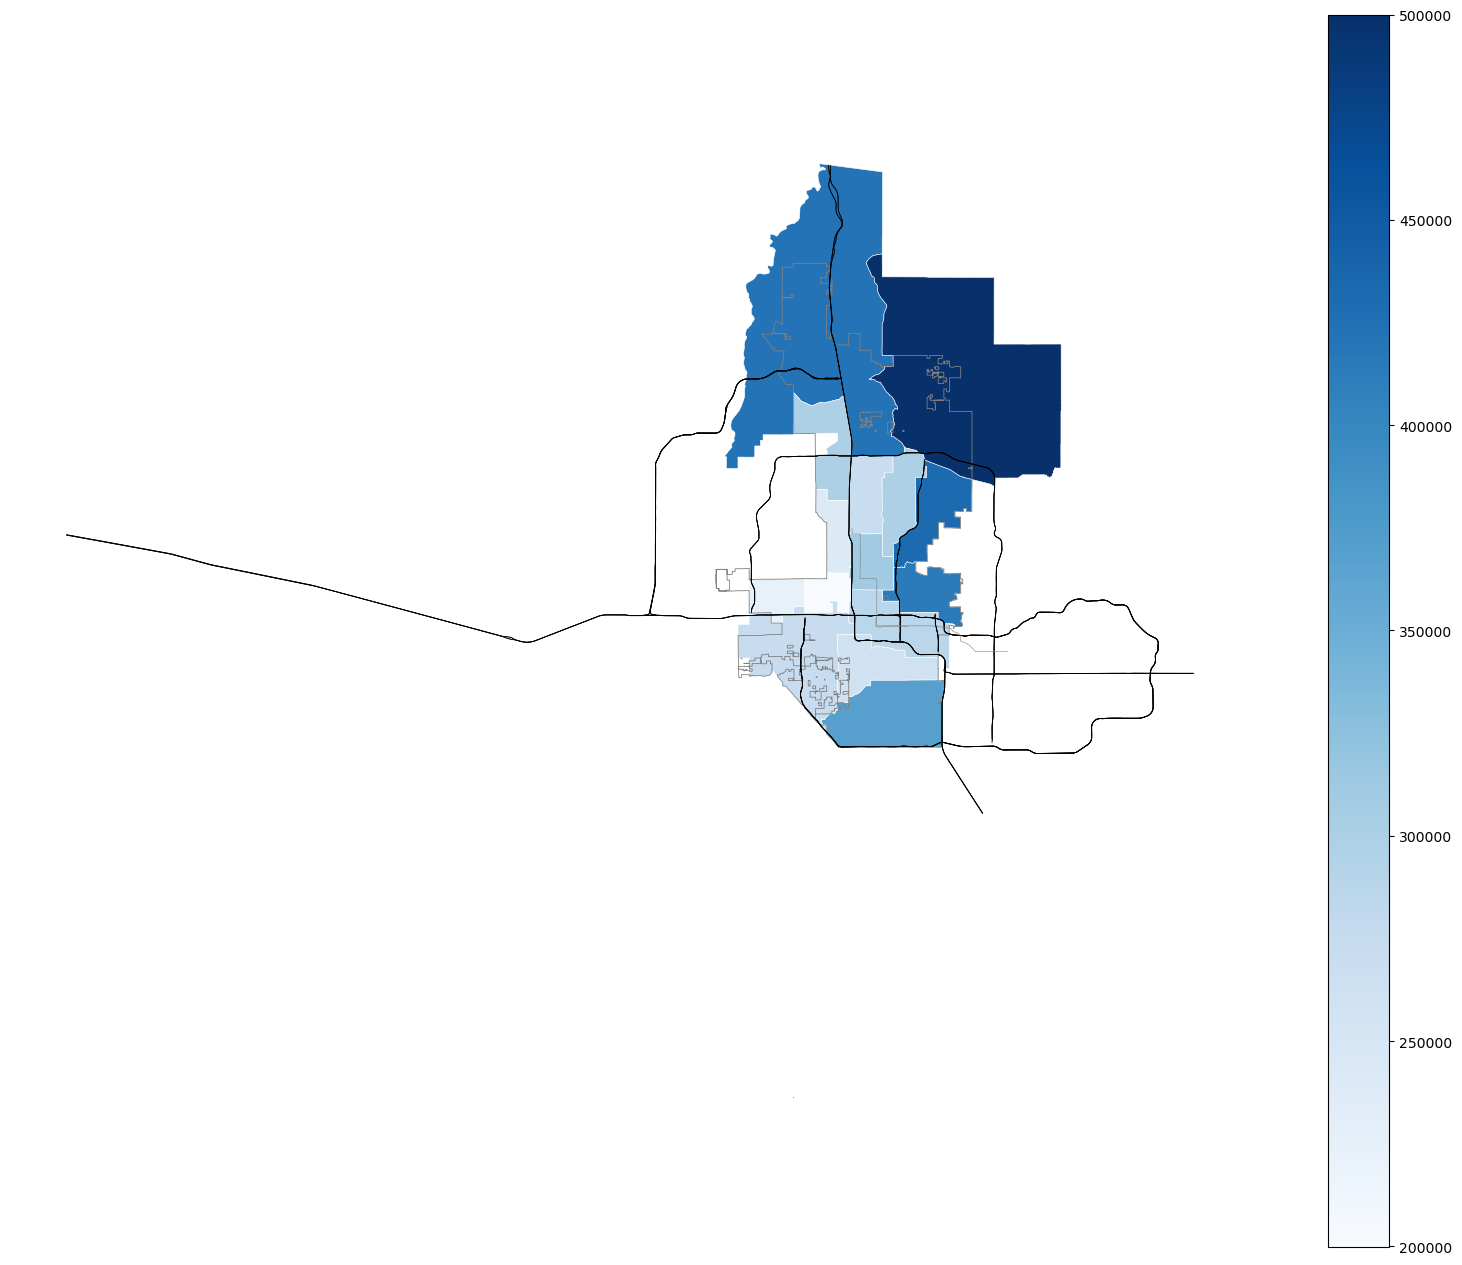

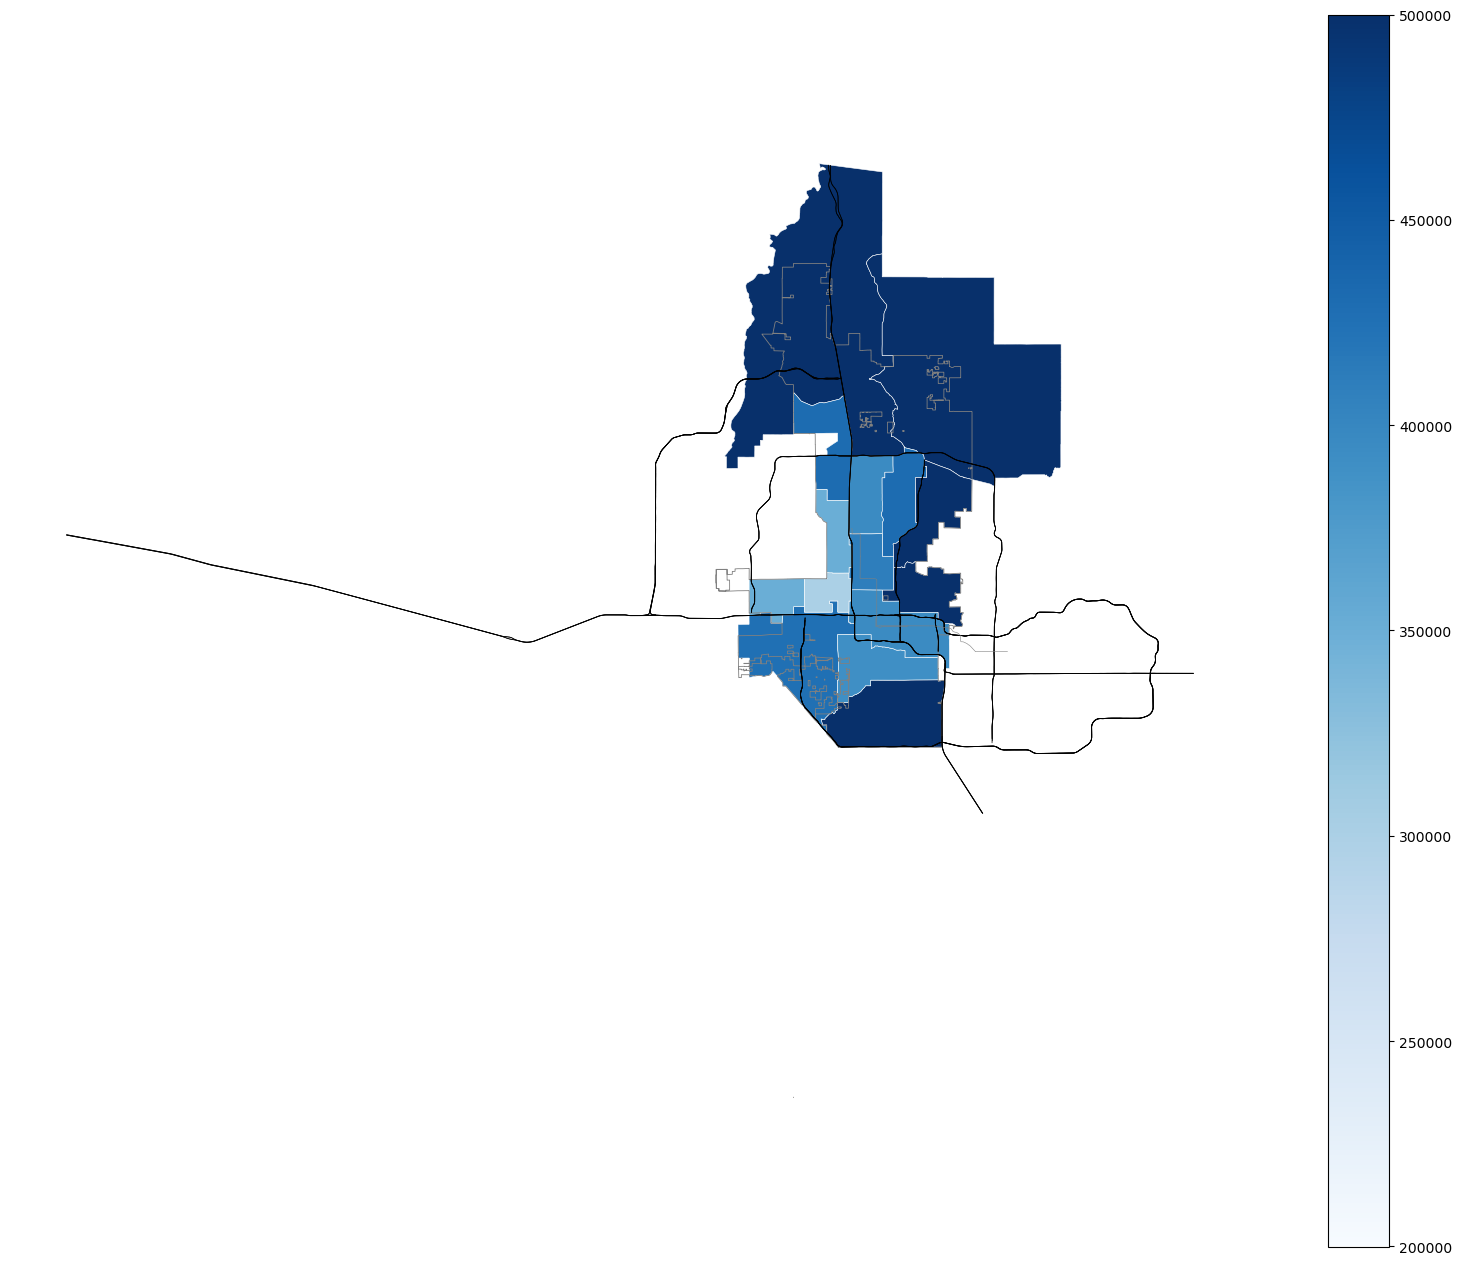

In [31]:
for med in ['med_19_infl','med_22']: 
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    new_norm = plt.Normalize(vmin=200000,vmax=500000)
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
    sm.set_array([])
    sales.plot(column = f'{med}', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
    phx.plot(ax=ax,color='none',edgecolor='gray',linewidth=0.6)
    road.plot(ax=ax,color='black',edgecolor='none',linewidth=0.5)
    lightrail.plot(ax=ax,color='gray',edgecolor='none',linewidth=0.4)
    fig.colorbar(sm)
    plt.savefig(f'sales_med_{med[4:6]}.jpg', dpi = 300) # saving each

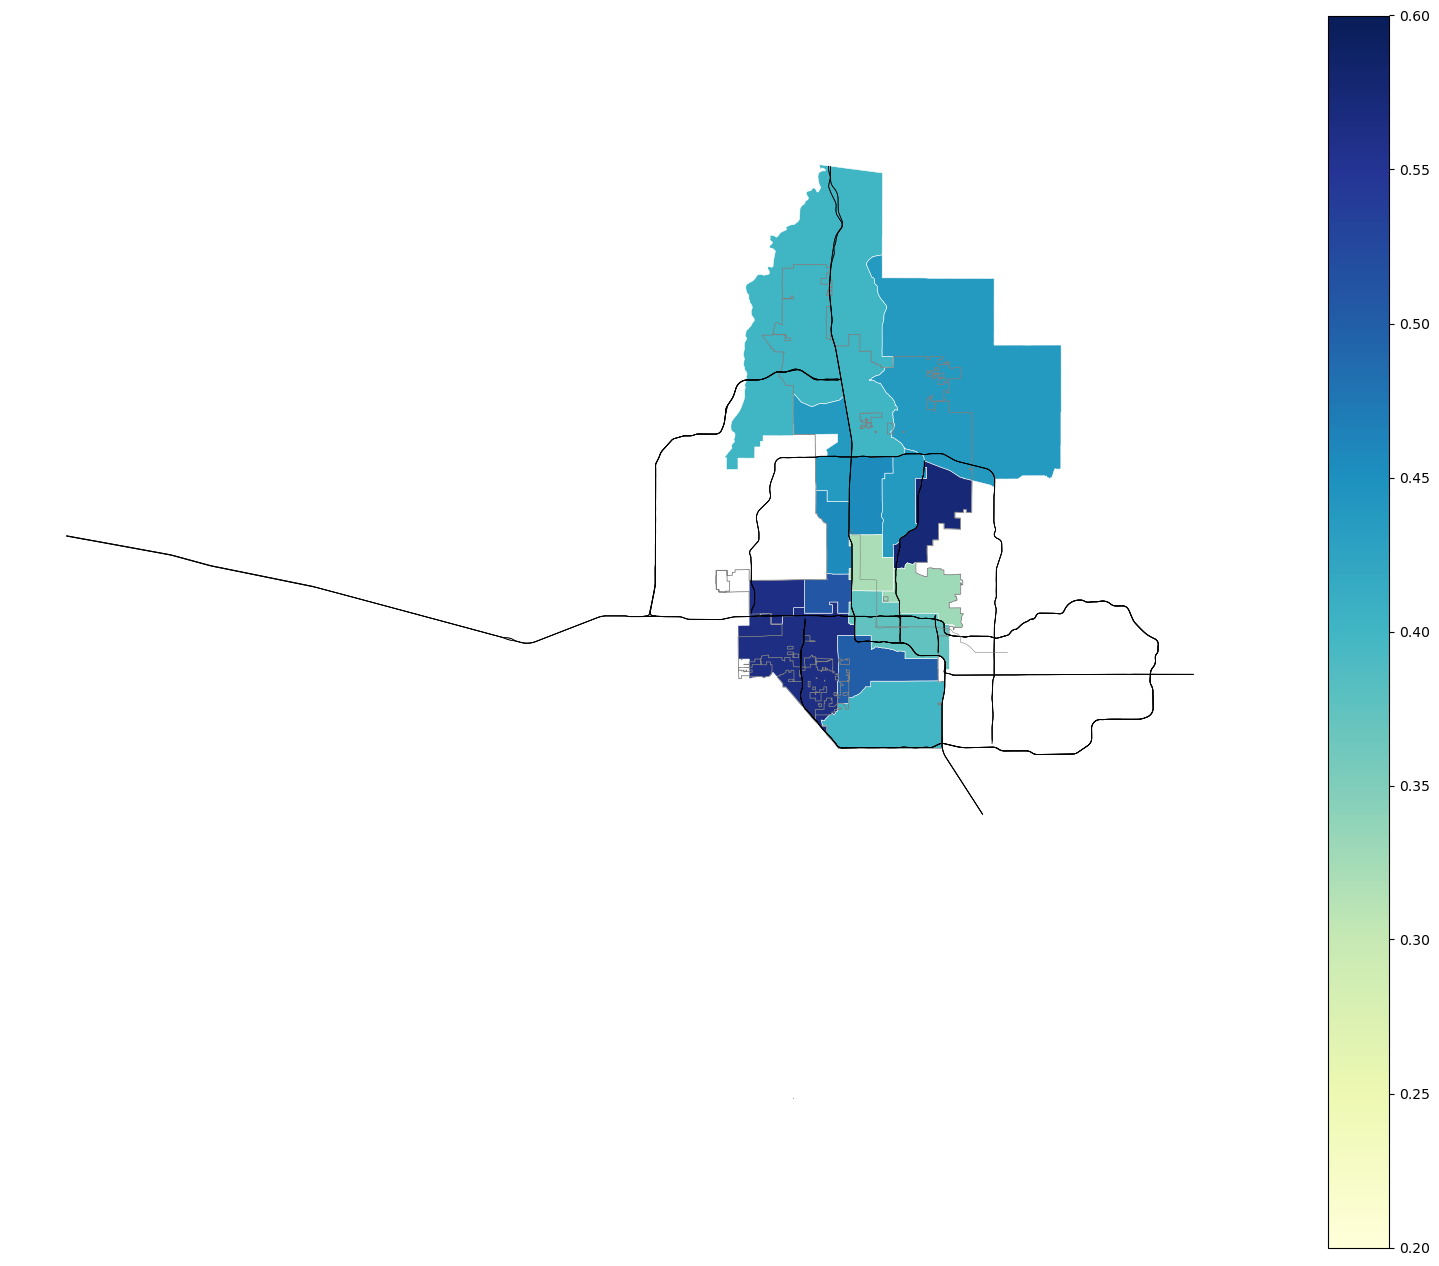

In [32]:
# percent change in median price (adjusting for inflation) 2019 - 2022
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.2,vmax=0.6)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
sales.plot(column = 'medp_1922', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
phx.plot(ax=ax,color='none',edgecolor='gray',linewidth=0.6)
road.plot(ax=ax,color='black',edgecolor='none',linewidth=0.5)
lightrail.plot(ax=ax,color='gray',edgecolor='none',linewidth=0.4)
fig.colorbar(sm)
plt.savefig(f'sales_medp_1922.jpg', dpi = 300) # saving image

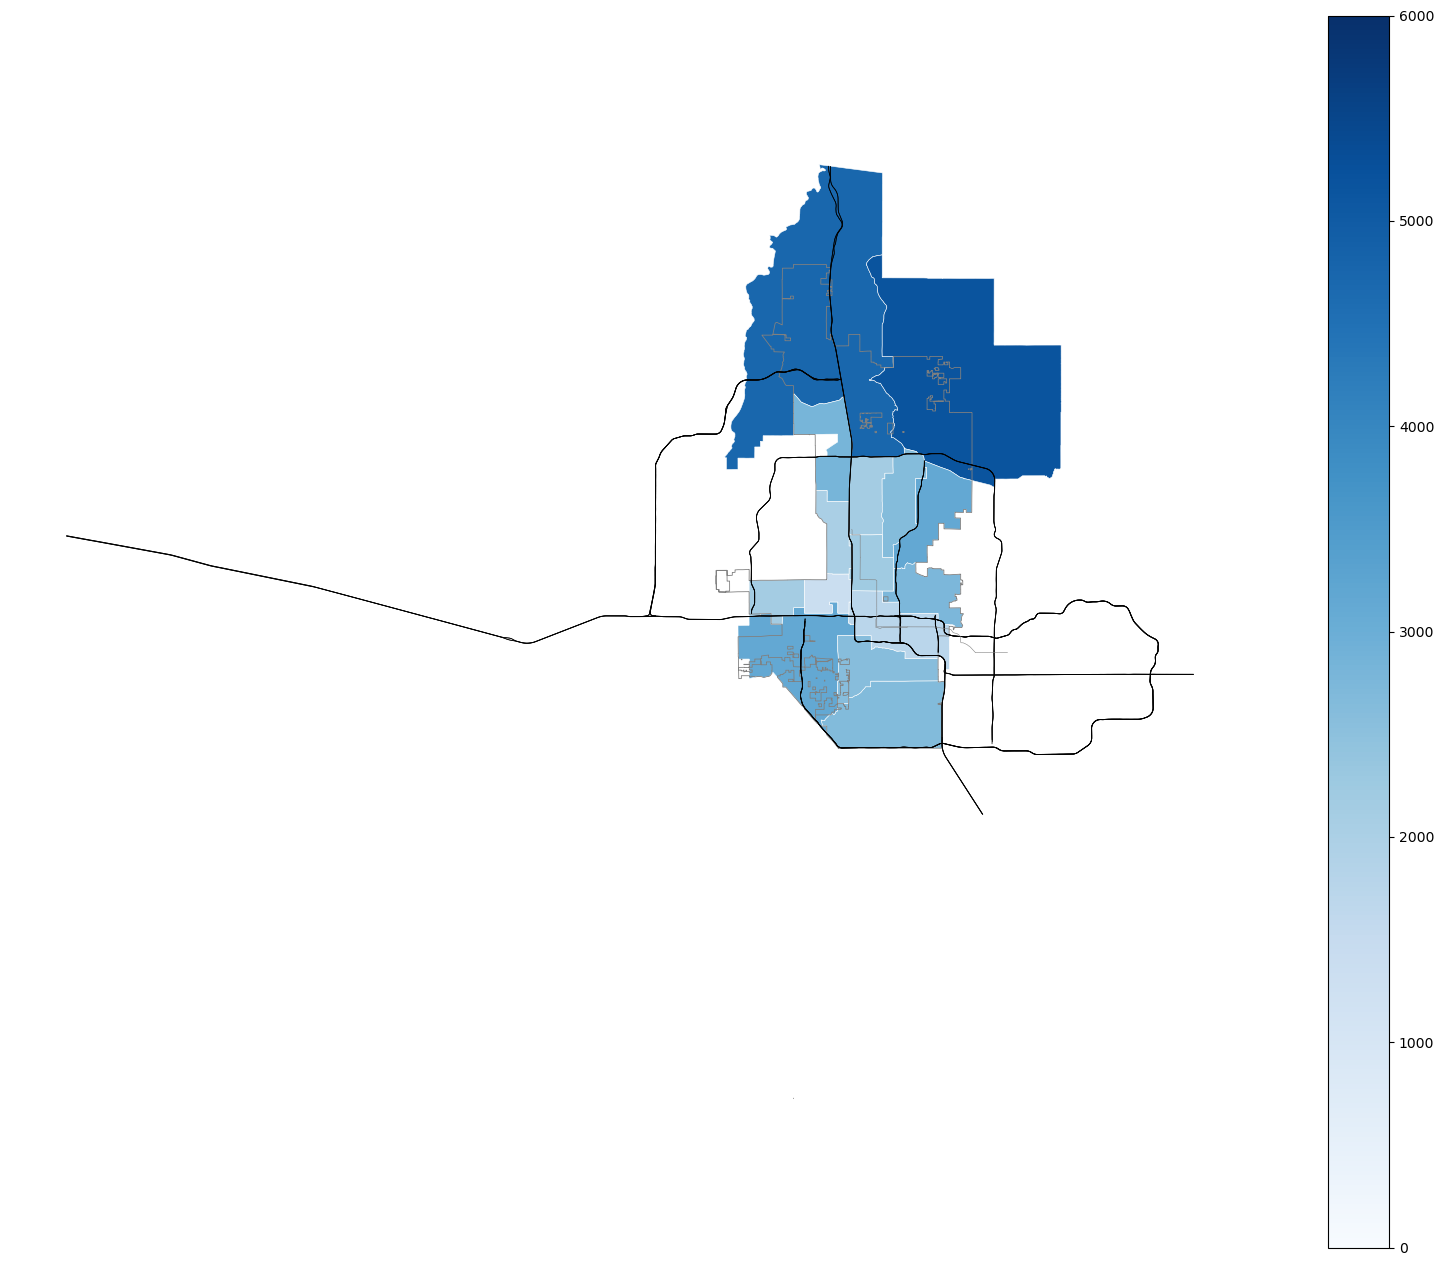

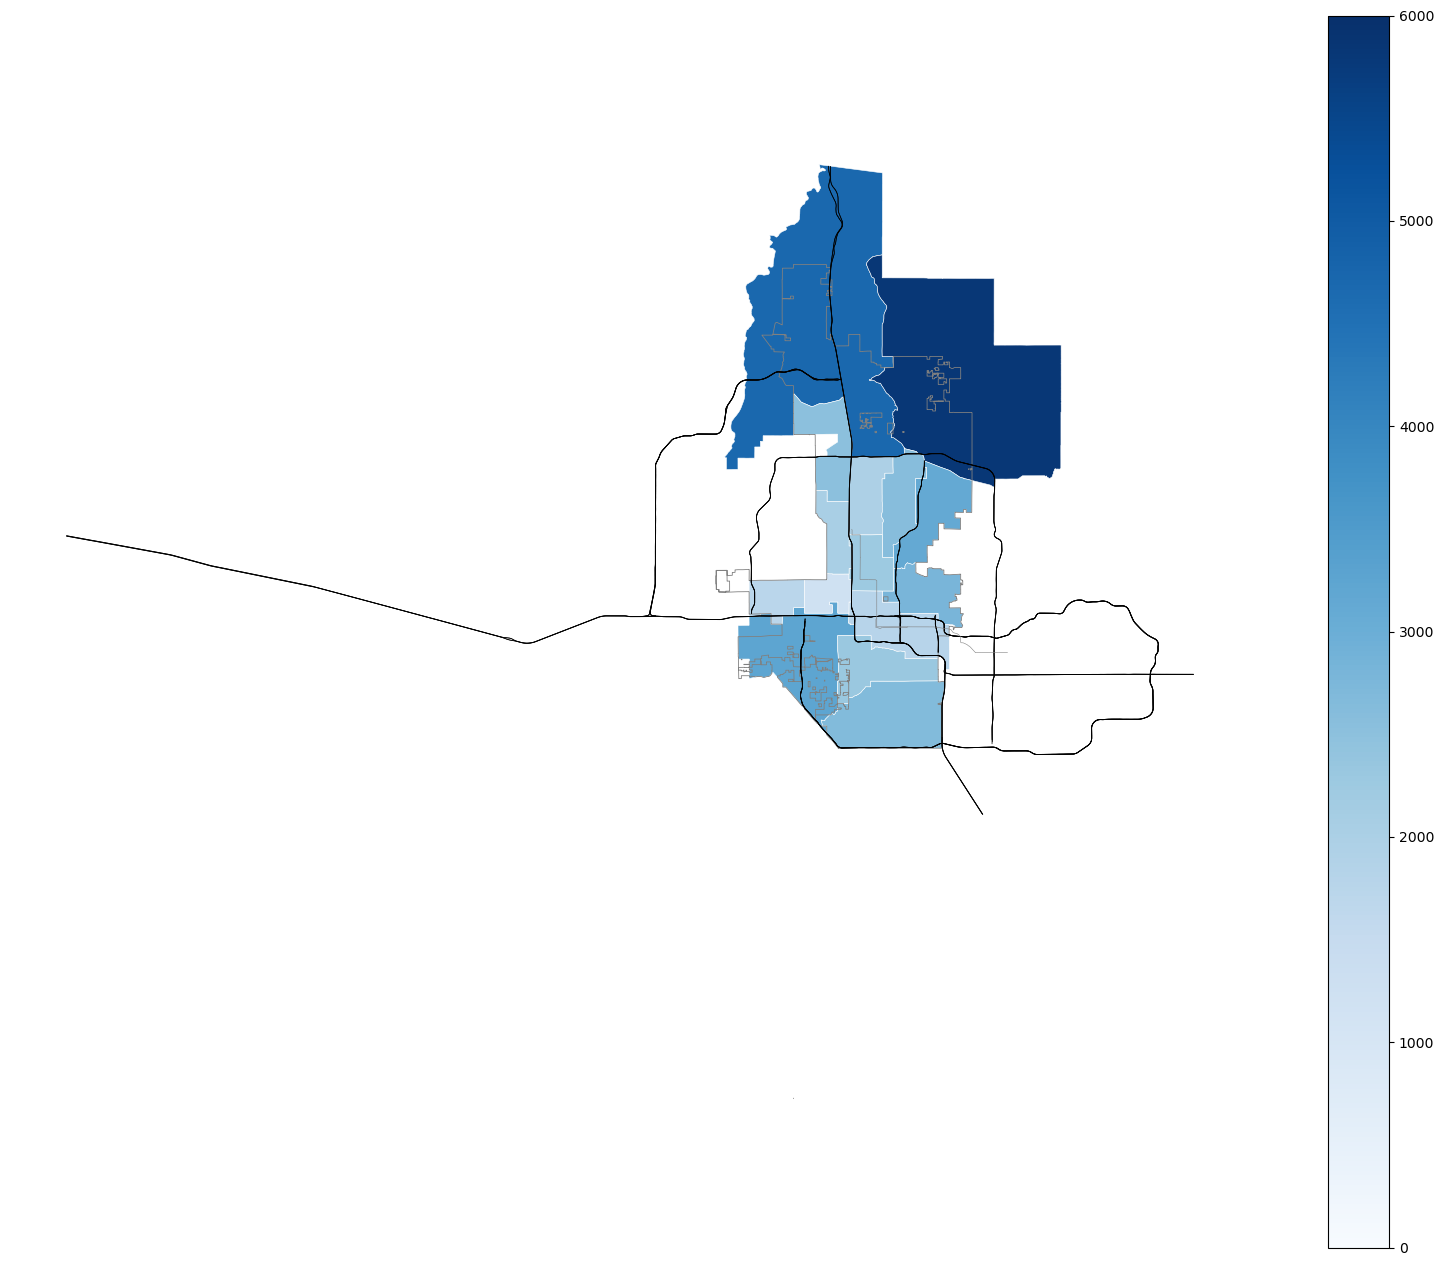

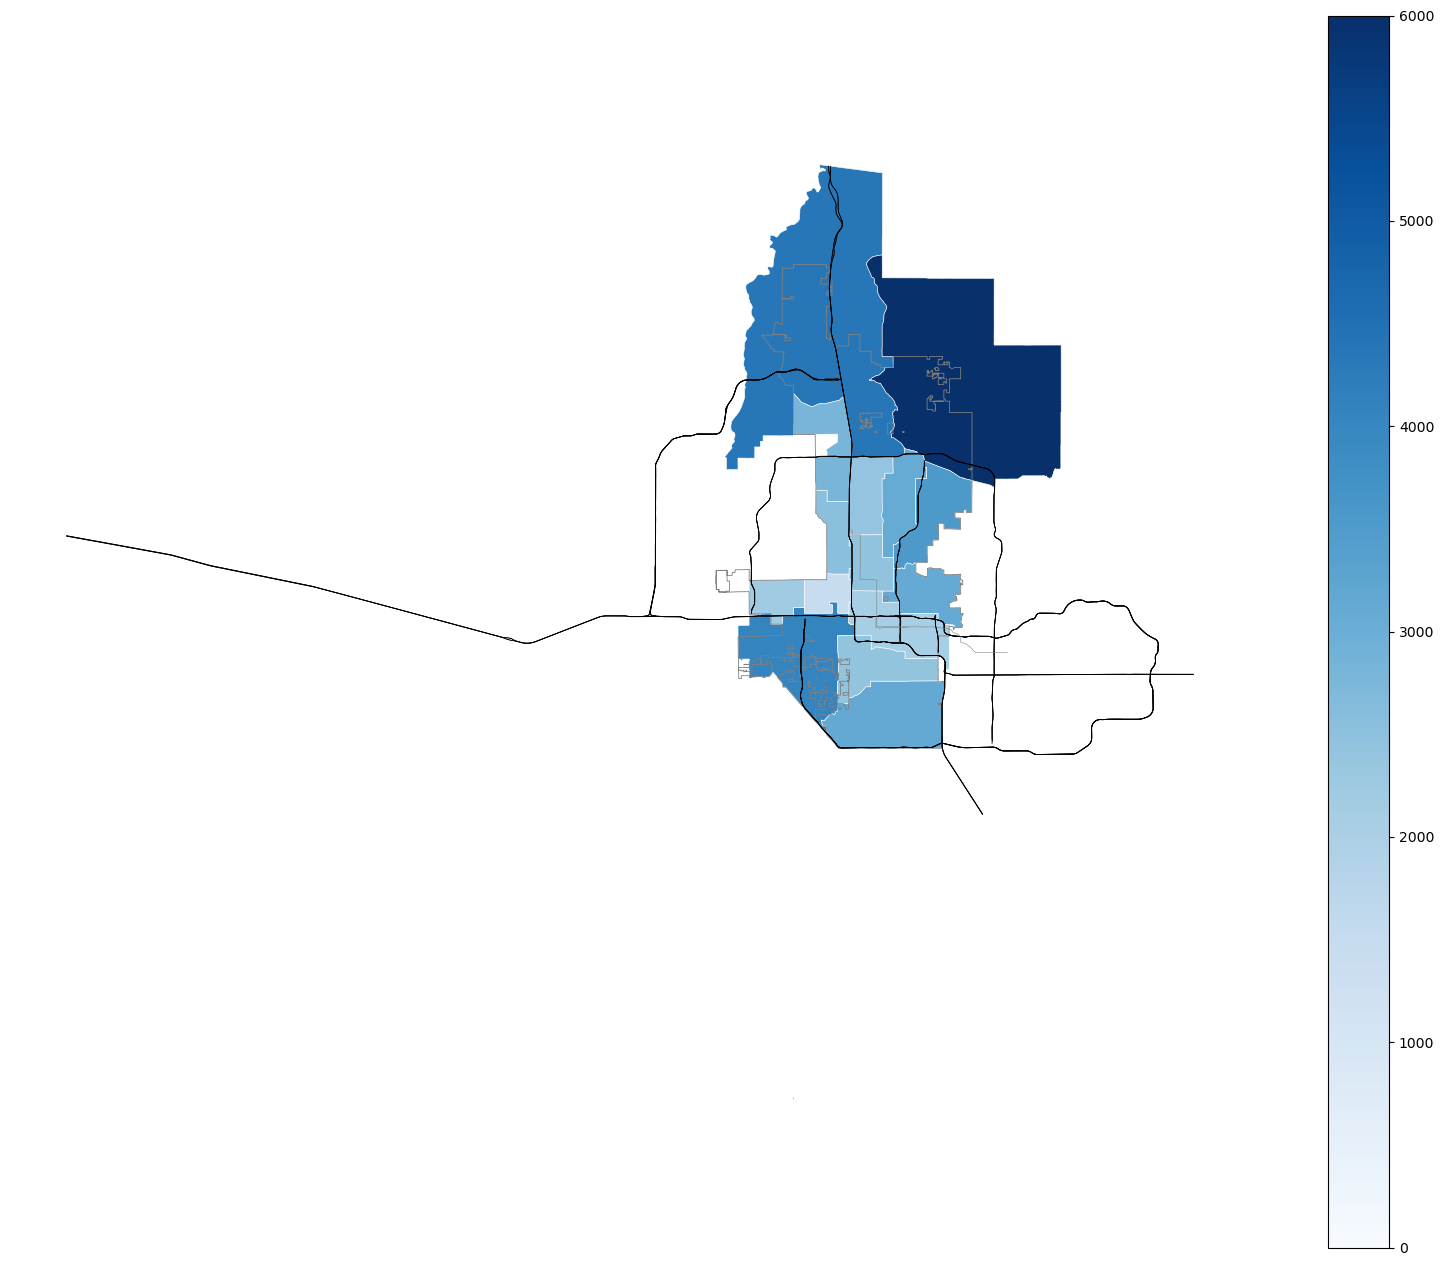

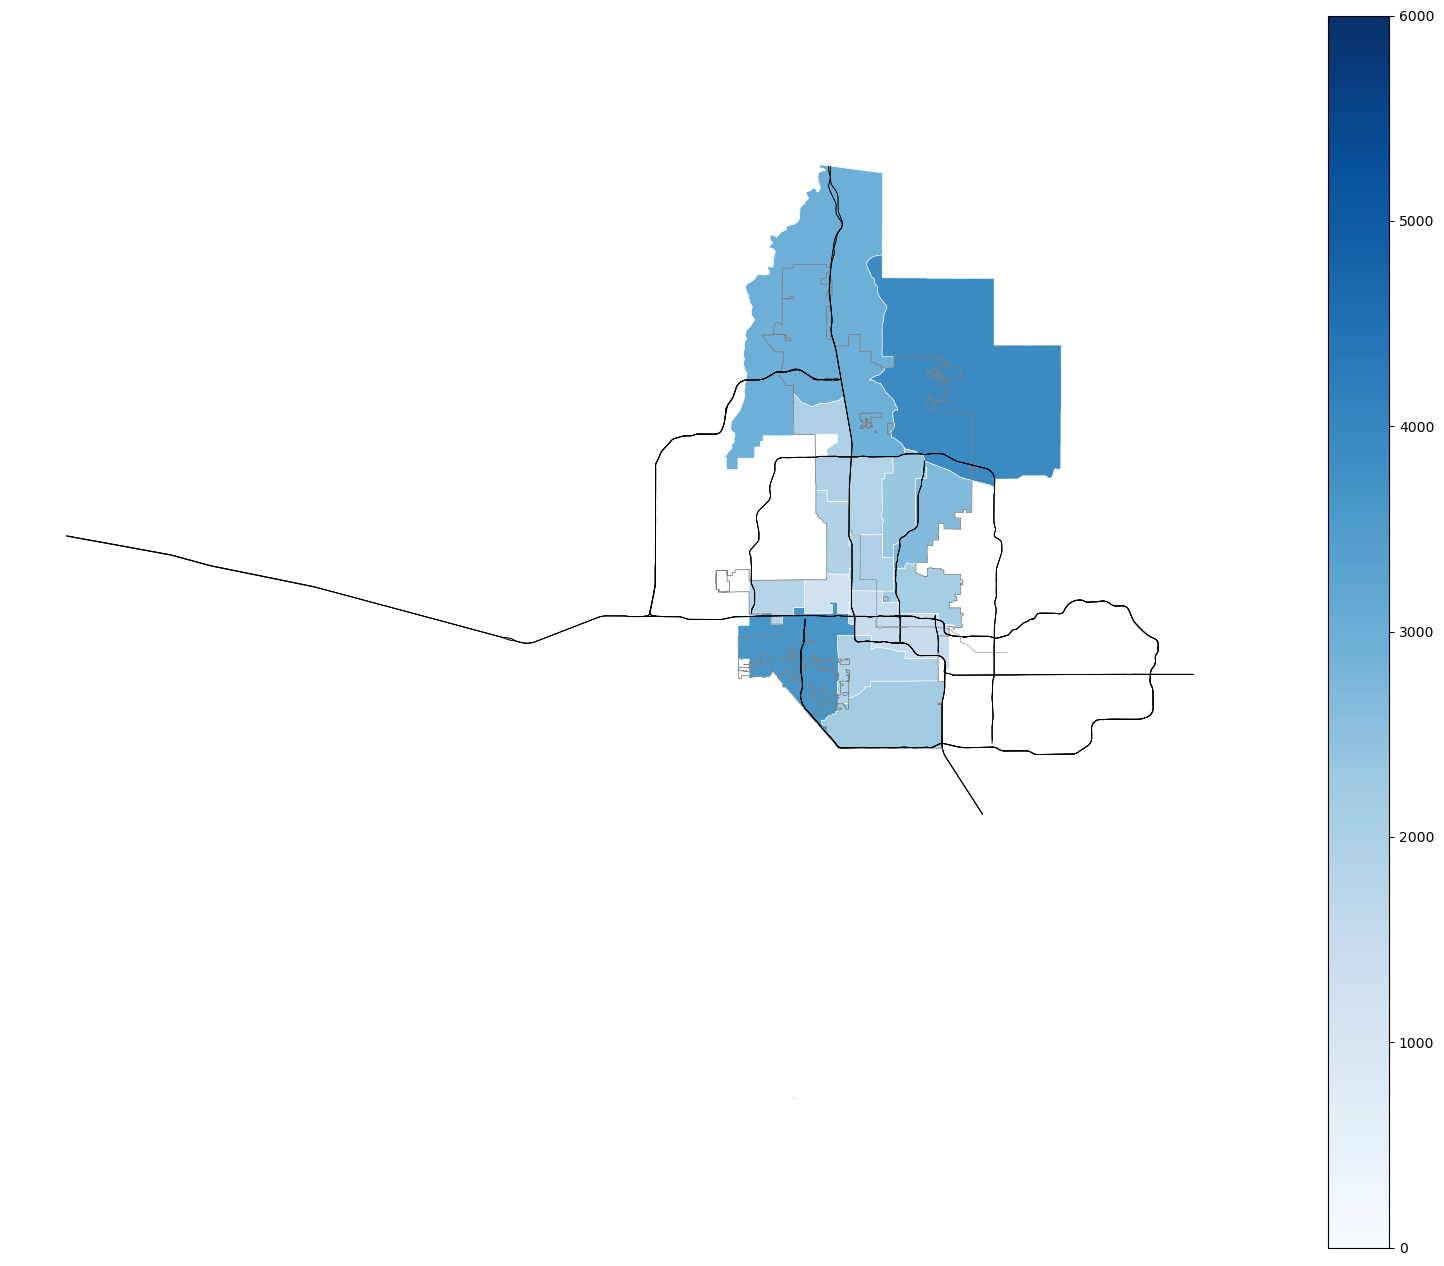

In [34]:
# total sales
for y in ['19','20','21','22']:
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    new_norm = plt.Normalize(vmin=0,vmax=6000)
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
    sm.set_array([])
    sales.plot(column = f'sales_{y}', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
    phx.plot(ax=ax,color='none',edgecolor='gray',linewidth=0.6)
    road.plot(ax=ax,color='black',edgecolor='none',linewidth=0.5)
    lightrail.plot(ax=ax,color='gray',edgecolor='none',linewidth=0.4)
    fig.colorbar(sm)
    plt.savefig(f'sales_{y}.jpg', dpi = 300) # saving image

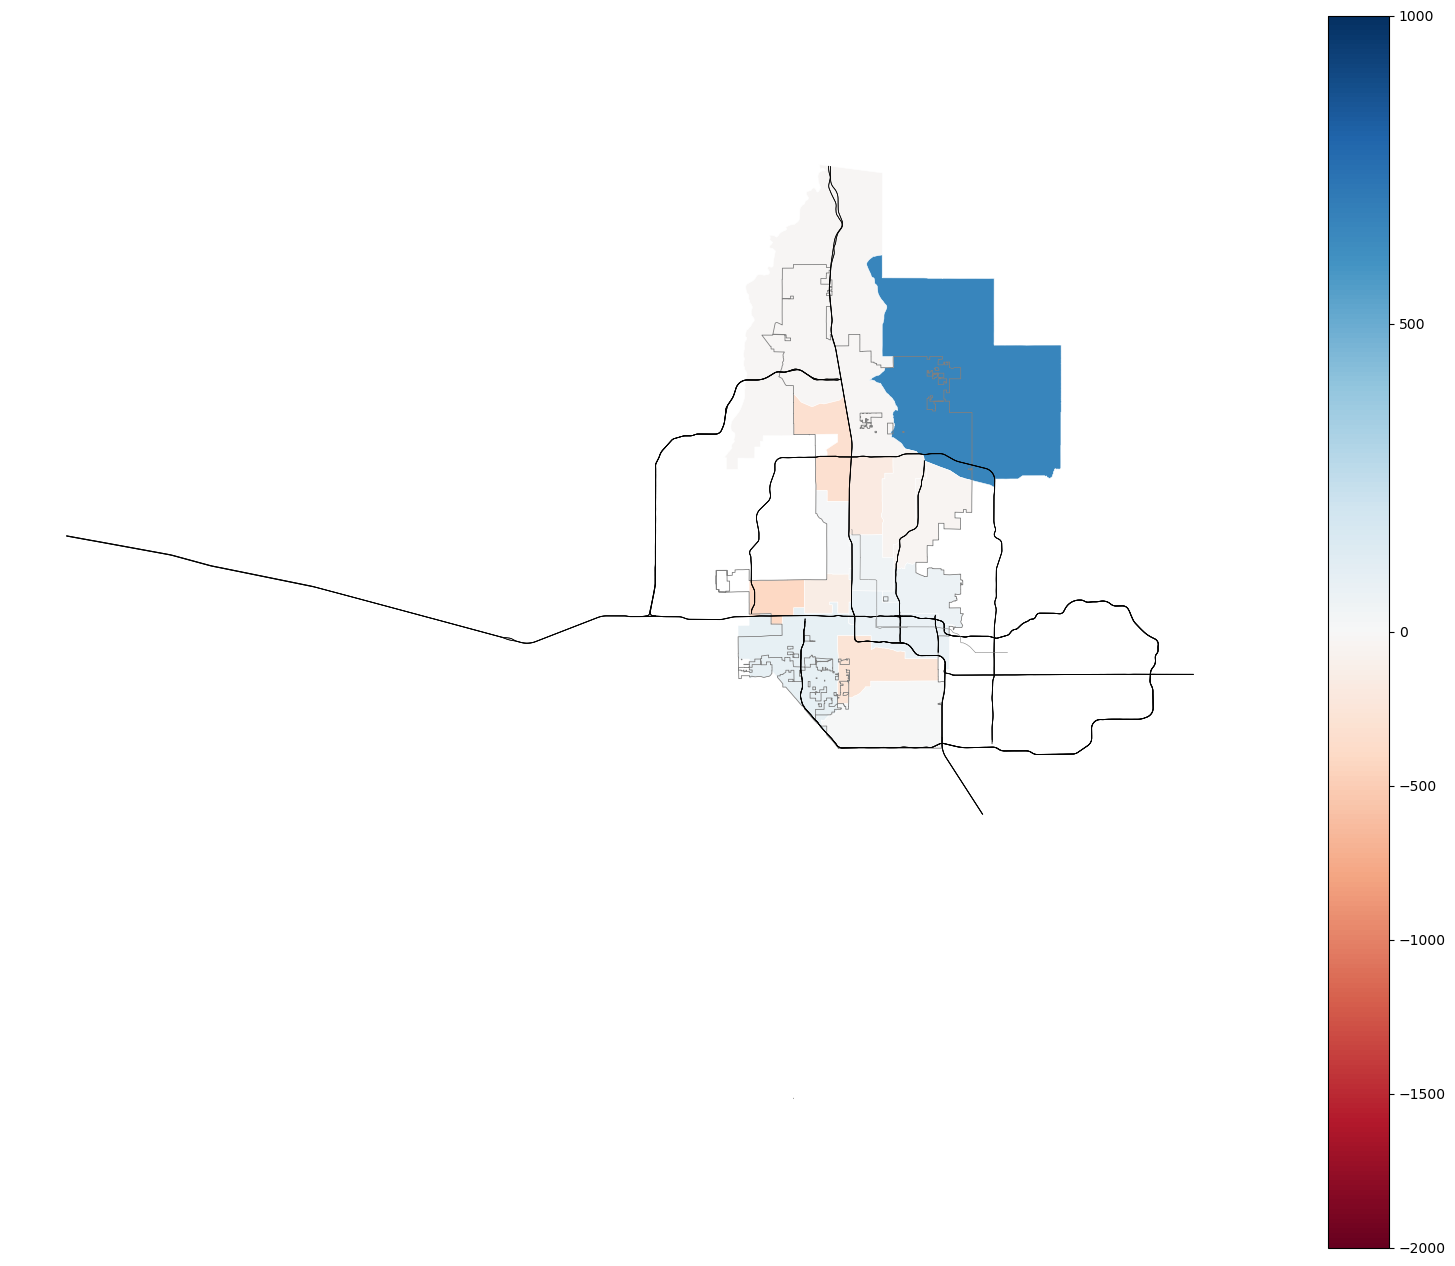

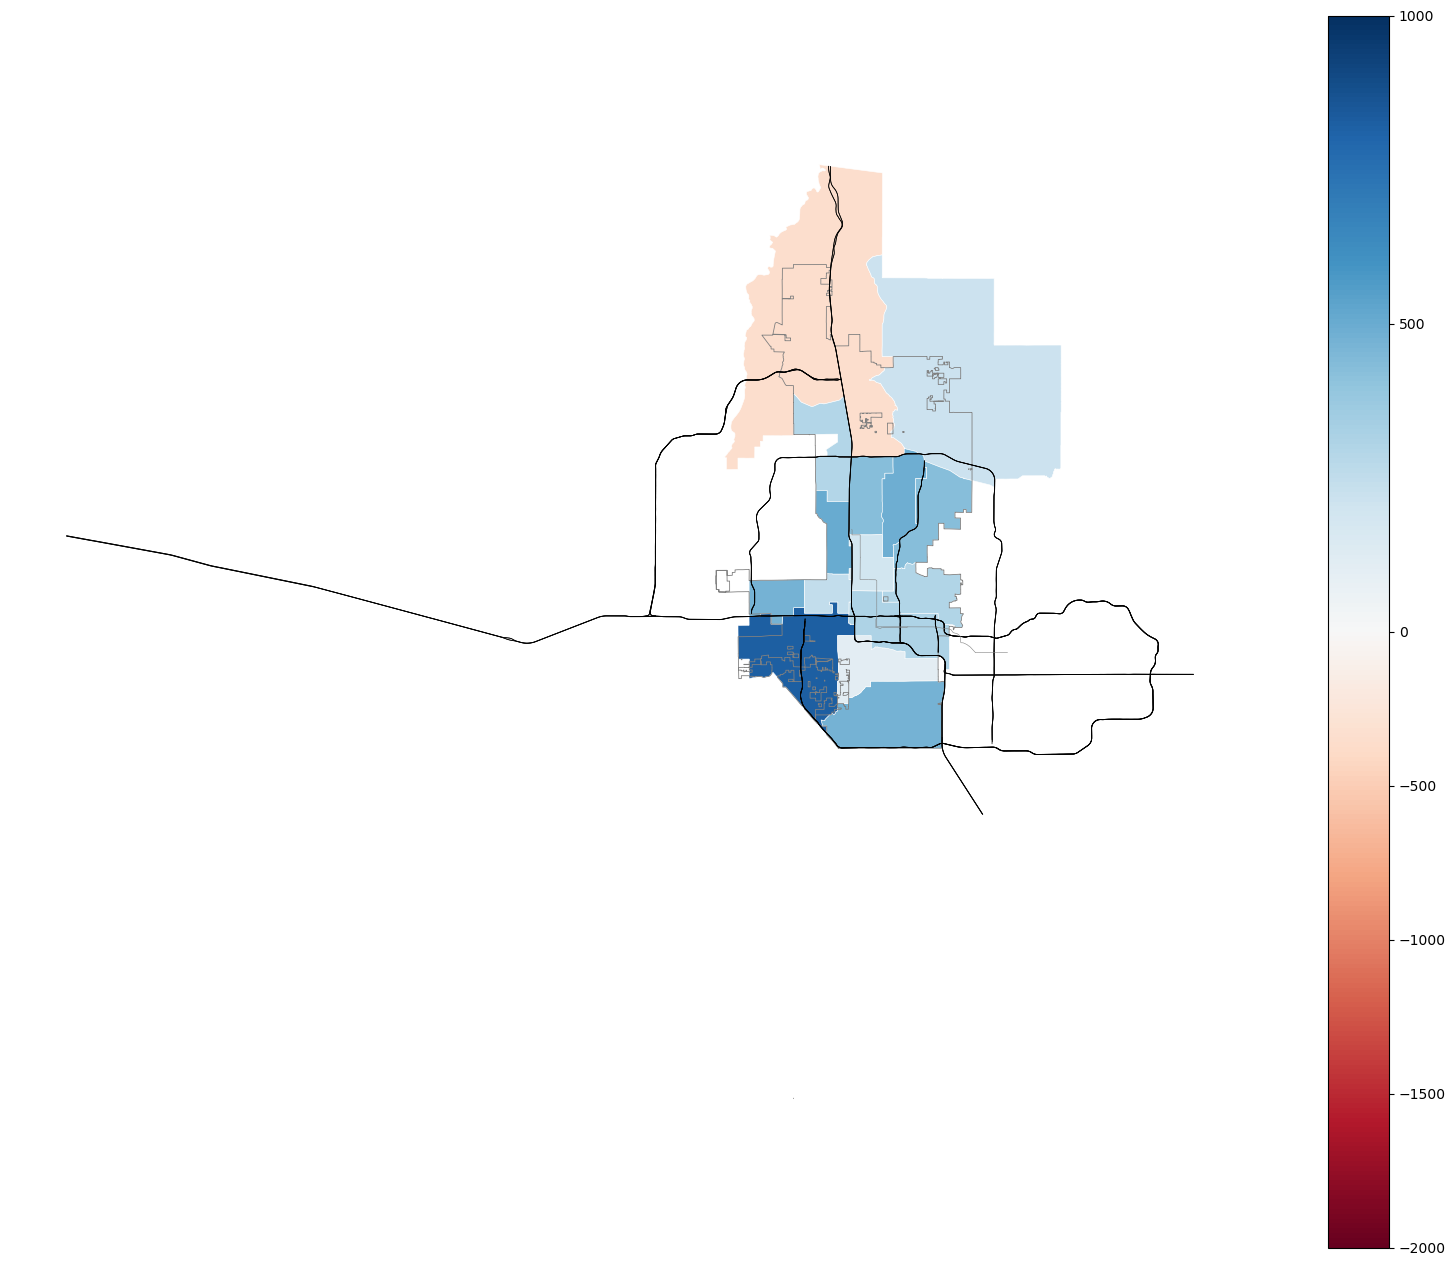

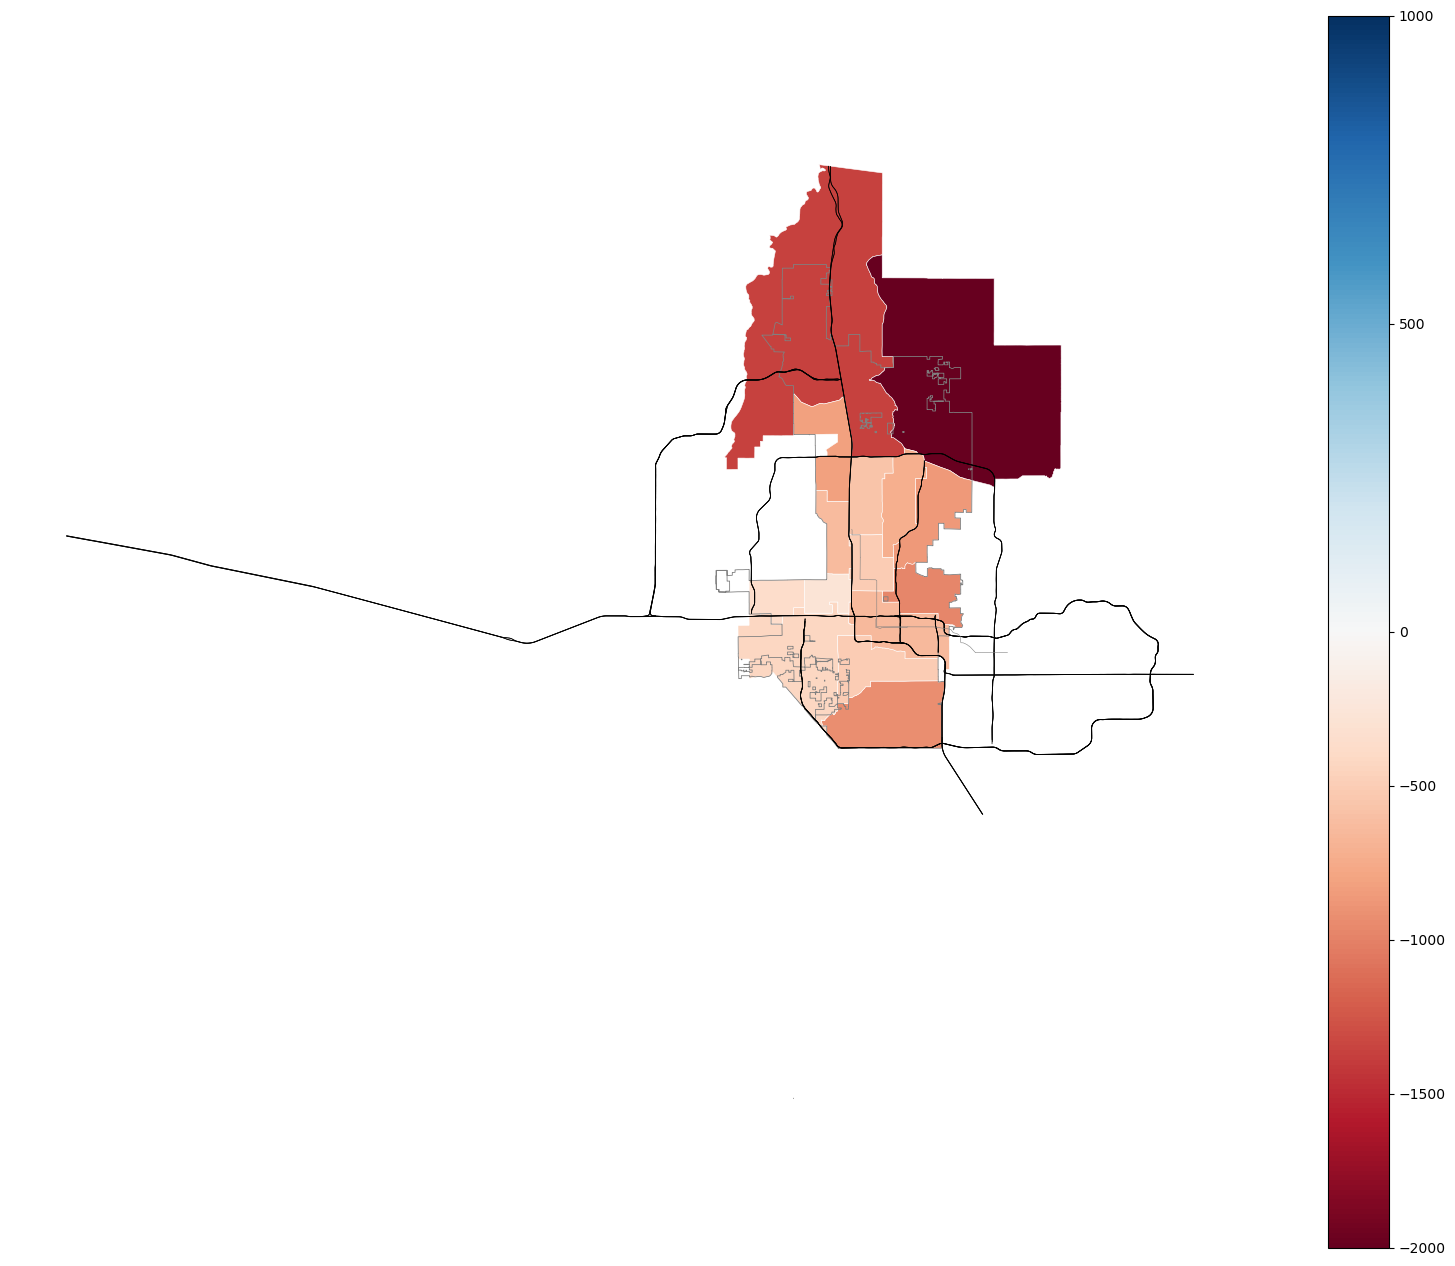

In [36]:
# yoy sales change
for y in ['20','21','22']:
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    divnorm = mpl.colors.TwoSlopeNorm(vmin= -2000, vcenter = 0,vmax = 1000) # within a 95% accuracy one way or other
    sm = plt.cm.ScalarMappable(cmap='RdBu', norm=divnorm)
    sm.set_array([])
    sales.plot(column = f'yoy_{y}', cmap='RdBu', norm=divnorm, edgecolor="white", linewidth=0.4, ax=ax)
    phx.plot(ax=ax,color='none',edgecolor='gray',linewidth=0.6)
    road.plot(ax=ax,color='black',edgecolor='none',linewidth=0.5)
    lightrail.plot(ax=ax,color='gray',edgecolor='none',linewidth=0.4)
    fig.colorbar(sm)
    plt.savefig(f'sales_yoy_{y}.jpg', dpi = 300) # saving image

In [12]:
sfr = sfr[['geometry','geoid','b1_22', 'b2_22','b3_22', 'b4_22','b1_1922',\
           'b2_1922', 'b3_1922', 'b4_1922',\
           'b1p_1922', 'b2p_1922', 'b3p_1922', 'b4p_1922']]